<div class="alert alert-success"><h2>1. Import and Preprocess the Data</h2></div>

In [58]:
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print('Training data shape:', train_images.shape)
print('Testing data shape:', test_images.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


Training Set Data

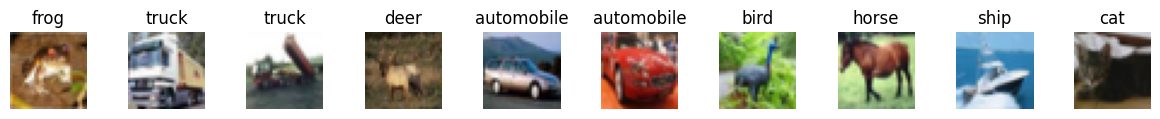

In [59]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(1, 10, figsize = (15, 1))
for i, ax in enumerate(axes):
    ax.imshow(train_images[i])
    ax.set_title(class_names[train_labels[i][0]])
    ax.axis('off')
plt.show()

<div class="alert alert-success"><h2>2. Normalisation and One-Hot Encoding</h2></div>

In [60]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [61]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

<div class="alert alert-success"><h2>2. Define the Model Architecture</h2></div>

In [62]:
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape = (32, 32, 3)),
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(rate = 0.25),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(rate = 0.25),
    
    layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(rate = 0.25),
    
    layers.Flatten(),
    layers.Dense(units = 512, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.5),
    layers.Dense(units = 10, activation = 'softmax')
])

<div class="alert alert-success"><h2>3. Compile and Train the Model</h2></div>

In [63]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


In [64]:
history = model.fit(train_images, train_labels,
                    epochs = 20,
                    batch_size = 128,
                    validation_split = 0.1)

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3756 - loss: 1.9135 - val_accuracy: 0.1540 - val_loss: 2.6734
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5084 - loss: 1.3886 - val_accuracy: 0.5450 - val_loss: 1.2779
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.5712 - loss: 1.2107 - val_accuracy: 0.6132 - val_loss: 1.0948
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6062 - loss: 1.1117 - val_accuracy: 0.6298 - val_loss: 1.0446
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6334 - loss: 1.0451 - val_accuracy: 0.6544 - val_loss: 0.9889
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6519 - loss: 0.9914 - val_accuracy: 0.6518 - val_loss: 0.9979
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6626 - loss: 0.9632 - val_accuracy: 0.6610 - val_loss: 0.9841
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6781 - loss: 0.9178 - val_acc

<div class="alert alert-success"><h2>4. Model Performance in Each Epoch</h2></div>

Model Accuracy

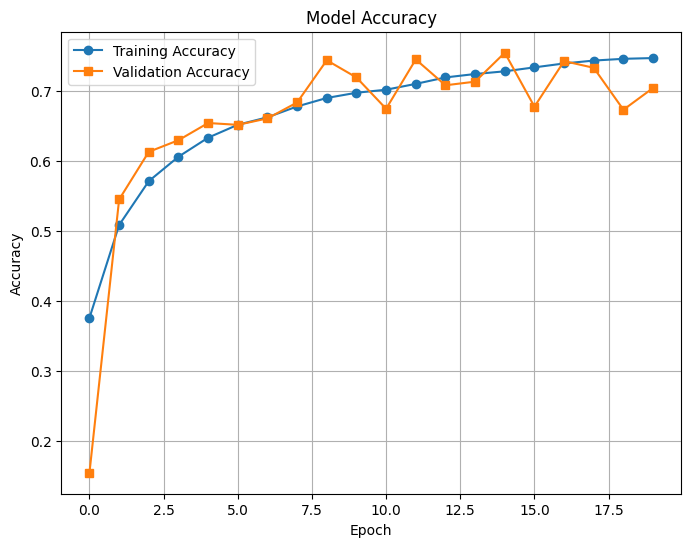

In [67]:
plt.figure(figsize = (8, 6))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', marker = 'o')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', marker = 's')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Model Loss

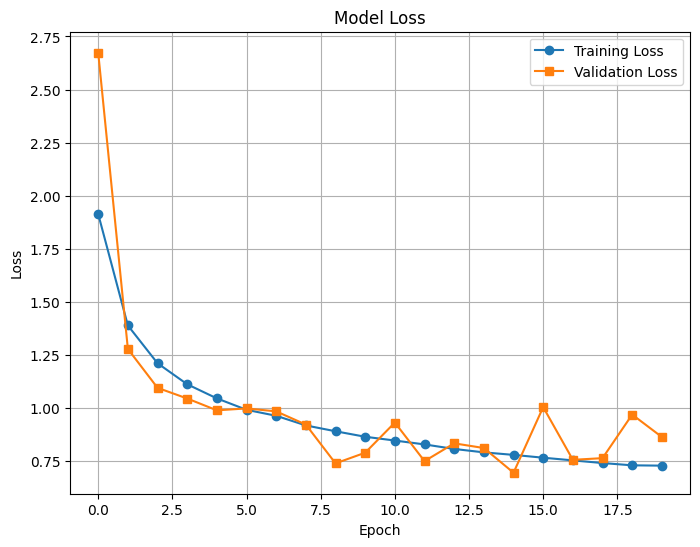

In [70]:
plt.figure(figsize = (8, 6))
plt.plot(history.history['loss'], label = 'Training Loss', marker = 'o')
plt.plot(history.history['val_loss'], label = 'Validation Loss', marker = 's')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-success"><h2>5. Evaluate the Model</h2></div>

In [71]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6843 - loss: 0.9072
Test Accuracy: 0.6843


<div class="alert alert-success"><h2>6. Testing with Local Image </h2></div>

In [72]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0      # normalize
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [74]:
img_path = ["unknown_1.jpeg", "unknown_2.jpg", "unknown_3.jpg", "unknown_4.jpg", "unknown_5.jpg", "unknown_8.jpg", "unknown_9.jpg"]   # 👈 local image path

for i in img_path:
    i = "images/" + i 
    img = load_and_preprocess_image(i)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    print("image: ", i , "is Predicted as a class:", class_names[predicted_class])
    print("Confidence:", predictions[0][predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
image:  images/unknown_1.jpeg is Predicted as a class: truck
Confidence: 0.775161
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
image:  images/unknown_2.jpg is Predicted as a class: frog
Confidence: 0.713361
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
image:  images/unknown_3.jpg is Predicted as a class: deer
Confidence: 0.9898835
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
image:  images/unknown_4.jpg is Predicted as a class: dog
Confidence: 0.78158164
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
image:  images/unknown_5.jpg is Predicted as a class: truck
Confidence: 0.7412386
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
image:  images/unknown_8.jpg is Predicted as a class: dog
Confidence: 0.68456054
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
image:  images/unknown_9.jpg is Predicted as a class: truck
Confidence: 0.7670976
